In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

arquivo_excel = "Vendas_Apple_2024_C.xlsx"
df = pd.read_excel(arquivo_excel)
print(df.head())


  País/Estado         Região  Venda iPhone (em milhão)  \
0   Chongqing  Greater China                      7.46   
1     Germany         Europe                      8.63   
2          UK         Europe                      5.61   
3    Shanghai  Greater China                      7.82   
4    Thailand   Rest of Asia                     16.70   

   Venda iPad (em milhão)  Vendas Mac (em milhão)  Wearables (em milhão)  \
0                    6.75                    1.19                   5.88   
1                   14.06                    7.03                   7.42   
2                   14.09                    8.78                   8.19   
3                    7.97                    9.78                   2.28   
4                    8.13                    6.46                   3.48   

   Faturamento Serviços (em bilhão)  
0                             15.88  
1                             10.12  
2                             19.85  
3                              6.16  
4   

          Região  Faturamento Serviços (em bilhão)
1  Greater China                           2780.72
4  Rest of World                           2701.75
0         Europe                           2416.30
2  North America                           2281.21
3   Rest of Asia                           2267.15


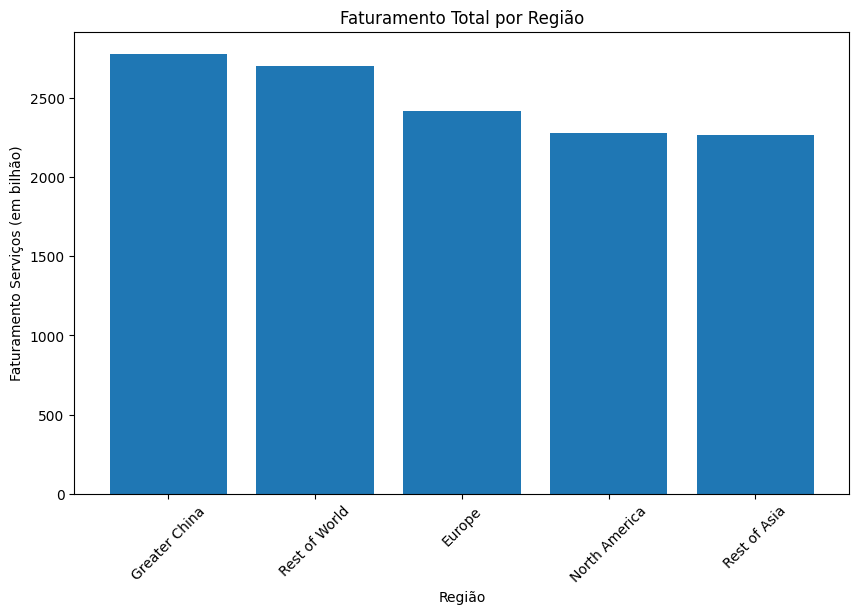

In [5]:
# Agrupando por região e somaando o faturamento
faturamento_por_regiao = df.groupby("Região")["Faturamento Serviços (em bilhão)"].sum().reset_index()

# Ordenando pelo faturamento em ordem decrescente
faturamento_por_regiao = faturamento_por_regiao.sort_values(by="Faturamento Serviços (em bilhão)", ascending=False)
print(faturamento_por_regiao)

# Visualizando os resultados no gráfico
plt.figure(figsize=(10, 6))
plt.bar(faturamento_por_regiao["Região"], faturamento_por_regiao["Faturamento Serviços (em bilhão)"])
plt.title("Faturamento Total por Região")
plt.xlabel("Região")
plt.ylabel("Faturamento Serviços (em bilhão)")
plt.xticks(rotation=45)
plt.show()

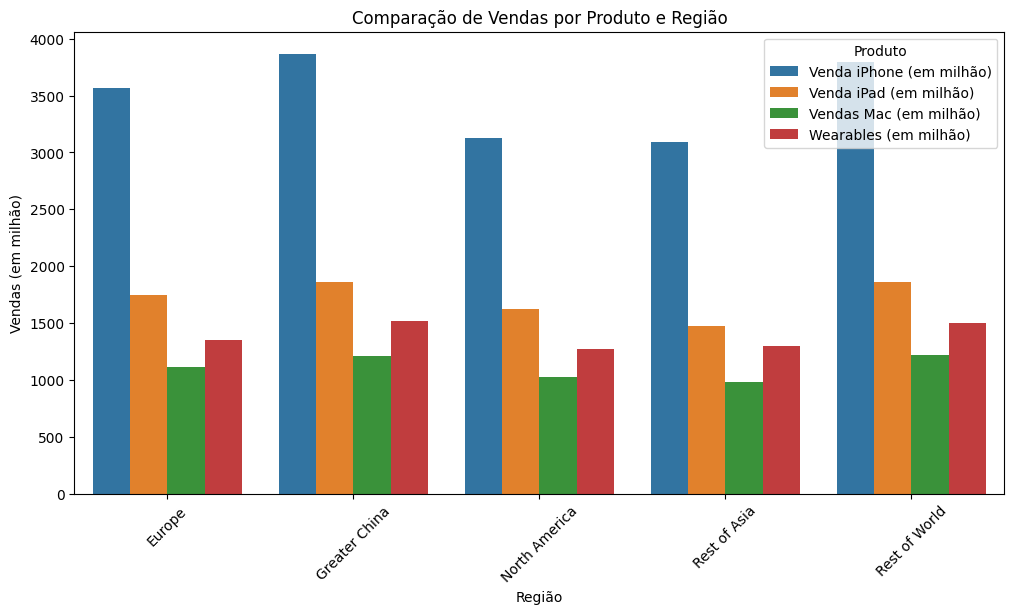

In [6]:
# Agrupando os dados por região e somando as vendas de cada produto
vendas_por_regiao = df.groupby("Região")[["Venda iPhone (em milhão)", "Venda iPad (em milhão)", "Vendas Mac (em milhão)", "Wearables (em milhão)"]].sum().reset_index()

# Visualizando os dados
vendas_por_regiao_melted = vendas_por_regiao.melt(id_vars="Região", var_name="Produto", value_name="Vendas (em milhão)")

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_regiao_melted, x="Região", y="Vendas (em milhão)", hue="Produto")
plt.title("Comparação de Vendas por Produto e Região")
plt.xlabel("Região")
plt.ylabel("Vendas (em milhão)")
plt.xticks(rotation=45)
plt.legend(title="Produto")
plt.show()


In [14]:
# Calculando o faturamento total (produtos físicos + serviços)
df["Faturamento Produtos (em bilhão)"] = (
    df["Venda iPhone (em milhão)"] +
    df["Venda iPad (em milhão)"] +
    df["Vendas Mac (em milhão)"] +
    df["Wearables (em milhão)"]
) / 1000  # Convertendo milhões para bilhões

df["Faturamento Total (em bilhão)"] = df["Faturamento Produtos (em bilhão)"] + df["Faturamento Serviços (em bilhão)"]

# Agrupando os dados por região para calcular a soma dos faturamentos
faturamento_regional = df.groupby("Região")[
    ["Faturamento Produtos (em bilhão)", "Faturamento Serviços (em bilhão)", "Faturamento Total (em bilhão)"]
].sum().reset_index()

# Calculando a porcentagem de contribuição dos serviços no faturamento total
faturamento_regional["% Serviços"] = (
    faturamento_regional["Faturamento Serviços (em bilhão)"] / faturamento_regional["Faturamento Total (em bilhão)"]
) * 100

# Exibindo o resultado final
print(faturamento_regional)


          Região  Faturamento Produtos (em bilhão)  \
0         Europe                           7.77312   
1  Greater China                           8.45889   
2  North America                           7.05146   
3   Rest of Asia                           6.84399   
4  Rest of World                           8.37418   

   Faturamento Serviços (em bilhão)  Faturamento Total (em bilhão)  % Serviços  
0                           2416.30                     2424.07312   99.679336  
1                           2780.72                     2789.17889   99.696725  
2                           2281.21                     2288.26146   99.691842  
3                           2267.15                     2273.99399   99.699032  
4                           2701.75                     2710.12418   99.691004  


In [25]:
# Calculando a média global de vendas para cada produto
medias_globais = {
    "Venda iPhone (em milhão)": df["Venda iPhone (em milhão)"].mean(),
    "Venda iPad (em milhão)": df["Venda iPad (em milhão)"].mean(),
    "Vendas Mac (em milhão)": df["Vendas Mac (em milhão)"].mean(),
    "Wearables (em milhão)": df["Wearables (em milhão)"].mean(),
}

# Criando um DataFrame para armazenar mercados com vendas abaixo da média
abaixo_da_media = df[
    (df["Venda iPhone (em milhão)"] < medias_globais["Venda iPhone (em milhão)"]) |
    (df["Venda iPad (em milhão)"] < medias_globais["Venda iPad (em milhão)"]) |
    (df["Vendas Mac (em milhão)"] < medias_globais["Vendas Mac (em milhão)"]) |
    (df["Wearables (em milhão)"] < medias_globais["Wearables (em milhão)"])
]

# Exibindo os mercados com vendas abaixo da média
print(abaixo_da_media.head(10))
print(abaixo_da_media.shape[0],"Mercados com vendas de pelo menos um dos produtos abaixo da média global.")  # Número de mercados identificados


  País/Estado         Região  Venda iPhone (em milhão)  \
0   Chongqing  Greater China                      7.46   
1     Germany         Europe                      8.63   
2          UK         Europe                      5.61   
3    Shanghai  Greater China                      7.82   
4    Thailand   Rest of Asia                     16.70   
5   Chongqing  Greater China                     12.18   
6          UK         Europe                     25.47   
7    New York  North America                     22.37   
8      Mexico  Rest of World                     20.80   
9       Italy         Europe                      9.06   

   Venda iPad (em milhão)  Vendas Mac (em milhão)  Wearables (em milhão)  \
0                    6.75                    1.19                   5.88   
1                   14.06                    7.03                   7.42   
2                   14.09                    8.78                   8.19   
3                    7.97                    9.78        

In [32]:
# Calculando as vendas totais (produtos físicos + serviços) por região
vendas_totais_regiao = df.groupby("Região")[
    ["Faturamento Produtos (em bilhão)", "Faturamento Serviços (em bilhão)", "Faturamento Total (em bilhão)"]
].sum().reset_index()

# Ordenando por Faturamento Total em ordem decrescente
vendas_totais_regiao = vendas_totais_regiao.sort_values(by="Faturamento Total (em bilhão)", ascending=False)

# Calculando a média global de faturamento total
media_global_faturamento = vendas_totais_regiao["Faturamento Total (em bilhão)"].mean()

# Identificando regiões com faturamento total abaixo da média
regioes_potencial_crescimento = vendas_totais_regiao[
    vendas_totais_regiao["Faturamento Total (em bilhão)"] < media_global_faturamento
].copy()

# Calculando a diferença percentual em relação à média global
regioes_potencial_crescimento["Diferença da Média (%)"] = (
    (media_global_faturamento - regioes_potencial_crescimento["Faturamento Total (em bilhão)"])
    / media_global_faturamento
) * 100

# Visualizando os resultados
print(regioes_potencial_crescimento)


          Região  Faturamento Produtos (em bilhão)  \
0         Europe                           7.77312   
2  North America                           7.05146   
3   Rest of Asia                           6.84399   

   Faturamento Serviços (em bilhão)  Faturamento Total (em bilhão)  \
0                           2416.30                     2424.07312   
2                           2281.21                     2288.26146   
3                           2267.15                     2273.99399   

   Diferença da Média (%)  
0                2.925491  
2                8.364209  
3                8.935565  
